Yelp Project Code:

In [8]:
import json
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
conn = sqlite3.connect('yelp.db')
cur = conn.cursor()

In [9]:
url = 'https://api.yelp.com/v3/businesses/search'
url2 = 'https://api.yelp.com/v3/businesses/{id}/reviews'

In [24]:
client_id = "WdeBQ0QfW7ctlNNGDyNEwA"
api_key = "qOP1w_dBiefuyHCkz5gzIlhtKzNxBNMi3uCVJib_Kzs_y0EKqn1pKpRlpGvAPmB2fZ_eVWv65j_o5rmiT9HNK10tH5rosM3GfauVdQU0TvfOtdqn4L3zzLC2g1P3X3Yx"

In [25]:
headers = {
        'Authorization': 'Bearer {}'.format(api_key),
    }

In [26]:
term = 'yoga'
location = 'Manhattan'
radius = 10000

In [27]:
url_params = {
                "term": term.replace(' ', '+'),
                "location": location.replace(' ', '+'),
                "radius" : radius,
                "limit": 50
            }

In [28]:
def yelp_call(url, url_params, api_key):
    # your code to make the yelp call
    response = requests.get(url, headers=headers, params=url_params)
    data = response.json()
    return data

In [29]:
NYCdata = yelp_call(url, url_params, api_key)

In [30]:
cur.execute("""CREATE TABLE businesses (
                                id INTEGER PIRMARY KEY, 
                                businessID TEXT,
                                rating INTEGER,
                                price TEXT,
                                name TEXT,
                                review_count TEXT,
                                city TEXT,
                                country TEXT
                                )          
            """)
conn.commit()

OperationalError: table businesses already exists

In [31]:
cur.execute("""CREATE TABLE reviews (
                                businessID TEXT,
                                reveiewID TEXT,
                                rating INTEGER,
                                time_created TEXT,
                                text TEXT
                                )          
            """)
conn.commit()

OperationalError: table reviews already exists

In [32]:
def parse_results(results):
    biz_list = []

    for business in results['businesses']:
        for item in ['businessID', 'rating', 'price', 'name', 'review_count', 'city', 'country']:
            if item not in business:
                business[item] = np.nan
            else: 
                business[item]
        biz_tuple = ( business['id'], 
                      business['rating'],
                      business['price'],
                      business['name'],
                      business['review_count'],
                      business['location']['city'],
                      business['location']['country']
                      )    
        biz_list.append(biz_tuple)
    return biz_list

In [33]:
def insert_values(conn, cur, parse_results):
    add_business = ("""
    INSERT INTO businesses (businessID, rating, price, name, review_count, city, country)
    VALUES (?, ?, ?, ?, ?, ?, ?) """)
        
    cur.executemany(add_business, parse_results)
    conn.commit()
        

In [34]:
num = NYCdata['total']
num

1200

In [35]:
# create a variable  to keep track of which result you are in. 
current_offset = 0
#num = NYCdata['total']
#set up a while loop to go through and grab the result 
while current_offset < 1000:
    #set the offset parameter to be where you currently are in the results 
    url_params['offset'] = current_offset
    #make your API call with the new offset number
    results = yelp_call(url, url_params, api_key)
    
    #after you get your results you can now use your function to parse those results
    parsed_results = parse_results(results)
    
    # use your function to insert your parsed results into the db
    insert_values(conn, cur, parsed_results)
    #increment the counter by 50 to move on to the next results
    print(current_offset)
    current_offset += 50

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950


In [36]:
location = 'London'

In [37]:
url_params = {
                "term": term.replace(' ', '+'),
                "location": location.replace(' ', '+'),
                "radius" : radius,
                "limit": 50
            }

In [23]:
# create a variable  to keep track of which result you are in. 
current_offset = 0
#num = NYCdata['total']
#set up a while loop to go through and grab the result 
while current_offset < 1000:
    #set the offset parameter to be where you currently are in the results 
    url_params['offset'] = current_offset
    #make your API call with the new offset number
    results = yelp_call(url, url_params, api_key)
    
    #after you get your results you can now use your function to parse those results
    parsed_results = parse_results(results)
    
    # use your function to insert your parsed results into the db
    insert_values(conn, cur, parsed_results)
    #increment the counter by 50 to move on to the next results
    print(current_offset)
    current_offset += 50

KeyError: 'businesses'

In [38]:
biz_list = cur.execute("""
SELECT businessID
FROM businesses
""").fetchall()

In [39]:
biz_list

[('kmj7FnZsKPPH3psbR9tX7Q',),
 ('GgvXfu8U80tcrxythjpB4w',),
 ('TlDcvf1cEK2im6e4AFYe3A',),
 ('npgq_up0_puDV5jieUza-A',),
 ('Oi85AYz9-Bx-9SBjNf__vg',),
 ('nuhFcWqgHBwmgwlbm4rI9w',),
 ('Chuu09nqfEQbREmaphoOuw',),
 ('FK_6tqTQuSkadiWQ1w8ttQ',),
 ('XpY0Cxo_Iw2deqeY6zsNOA',),
 ('nkUwnPPYmCICZ8nYCu_twg',),
 ('tGtrhu0YDGkM9ECrYVz6xg',),
 ('omwcHHgdgUJn-W1b3i78og',),
 ('Mc17IR6PG4iZLmZzciJEQQ',),
 ('oECxp7RoWT2QArWgqpwnMA',),
 ('c_80f3N3NbWDX8RnvuM3Xg',),
 ('x0bjd5AUu3ASzfjmht2IYA',),
 ('89VGtFw9HZASM0IdnSEeFA',),
 ('KjSI9xkCFTrRRbHOzCG7xg',),
 ('b1ziC3xpS5Bb9PGsufBYAw',),
 ('NqL3lVZgh1pz0tVaZBxkRg',),
 ('PZhmOvUx0HrdGvxVrxTJ5g',),
 ('vxNBDgBMP44E8DHuqj5z6A',),
 ('dzvqCMHOsvruyOZZ8wSnbA',),
 ('I3-EsRgXDcLx3OrlACCx3Q',),
 ('HcsOCtxnSpAmUU0EC_AGMQ',),
 ('JvwVi-ZOfGKQEiezZTCgEA',),
 ('qFJcpI5TOBQkX6BukZqUVw',),
 ('6-fZD_ZzKJo29zapElbOZg',),
 ('PISWOLCiOj47QbZKm-F3tg',),
 ('cwADiq0xORmv4QA2jhu-Pw',),
 ('fiLGdKwhkvK6pZ3E_GjHmQ',),
 ('qhjcMZivcYfr7CaTHkiXXg',),
 ('P5OZCF6xChJtWNrjNFBBRA',),
 ('gbRr9zR

In [40]:
biz_ID_list = []
for biz in biz_list:
    biz_ID = biz[0]
    biz_ID_list.append(biz_ID)

In [41]:
biz_ID_list

['kmj7FnZsKPPH3psbR9tX7Q',
 'GgvXfu8U80tcrxythjpB4w',
 'TlDcvf1cEK2im6e4AFYe3A',
 'npgq_up0_puDV5jieUza-A',
 'Oi85AYz9-Bx-9SBjNf__vg',
 'nuhFcWqgHBwmgwlbm4rI9w',
 'Chuu09nqfEQbREmaphoOuw',
 'FK_6tqTQuSkadiWQ1w8ttQ',
 'XpY0Cxo_Iw2deqeY6zsNOA',
 'nkUwnPPYmCICZ8nYCu_twg',
 'tGtrhu0YDGkM9ECrYVz6xg',
 'omwcHHgdgUJn-W1b3i78og',
 'Mc17IR6PG4iZLmZzciJEQQ',
 'oECxp7RoWT2QArWgqpwnMA',
 'c_80f3N3NbWDX8RnvuM3Xg',
 'x0bjd5AUu3ASzfjmht2IYA',
 '89VGtFw9HZASM0IdnSEeFA',
 'KjSI9xkCFTrRRbHOzCG7xg',
 'b1ziC3xpS5Bb9PGsufBYAw',
 'NqL3lVZgh1pz0tVaZBxkRg',
 'PZhmOvUx0HrdGvxVrxTJ5g',
 'vxNBDgBMP44E8DHuqj5z6A',
 'dzvqCMHOsvruyOZZ8wSnbA',
 'I3-EsRgXDcLx3OrlACCx3Q',
 'HcsOCtxnSpAmUU0EC_AGMQ',
 'JvwVi-ZOfGKQEiezZTCgEA',
 'qFJcpI5TOBQkX6BukZqUVw',
 '6-fZD_ZzKJo29zapElbOZg',
 'PISWOLCiOj47QbZKm-F3tg',
 'cwADiq0xORmv4QA2jhu-Pw',
 'fiLGdKwhkvK6pZ3E_GjHmQ',
 'qhjcMZivcYfr7CaTHkiXXg',
 'P5OZCF6xChJtWNrjNFBBRA',
 'gbRr9zRxpBtBLum9kMlxZw',
 'Vi_qAjnkRk4kCaMpx_-Gkg',
 'Vwy58_3fyh1LwcMCFGb5vQ',
 'Ai7Go_R0snWuiCL6rbYIXQ',
 

In [42]:

def yelp_call_reviews(ID):
        url = 'https://api.yelp.com/v3/businesses/{}/reviews'.format(ID)
    # your code to make the yelp call
        response = requests.get(url, headers=headers)
        data = response.json()
        return data['reviews']

In [43]:
def parse_reviews(businessID, lists_of_reviews):
    tuple_lists = []
    
    for d in lists_of_reviews:
        review_tuple = ( businessID, 
                        d['text'],
                        d['rating'],
                        d['time_created'],
                        d['id']
                      )
        tuple_lists.append(review_tuple)
    
    return tuple_lists

In [44]:
def insert_reviews(conn, cur, parse_reviews):
        add_reviews = ("""
        INSERT INTO reviews (businessID, reveiewID, rating, time_created, text)
        VALUES (?, ?, ?, ?, ?) """)
        cur.executemany(add_reviews, parse_reviews)
        conn.commit()

In [50]:
# create a variable  to keep track of which result you are in. 
#num = NYCdata['total']
#set up a while loop to go through and grab the result 
all_reviews = []

for biz in biz_ID_list:
    #set the offset parameter to be where you currently are in the results 
    #make your API call with the new offset number
    review_results = yelp_call_reviews(biz)
    if len(review_results) > 0:
        parsed_reviews = parse_reviews(biz, review_results)
        all_reviews.extend(parsed_reviews)
    #after you get your results you can now use your function to parse those results
    
    # use your function to insert your parsed results into the db
    #insert_reviews(conn, cur, parsed_reviews)

In [47]:
cur.execute("""
SELECT * FROM reviews
""")
df = pd.DataFrame(cur.fetchall())
df.columns = [x[0] for x in cur.description]
df

,businessID,text,rating,time_created,reviewID
0,kmj7FnZsKPPH3psbR9tX7Q,"Beginner Flow with Taquice, Sunday afternoon -...",5,2019-12-29 14:26:23,QJS08cT1I7c0Ev9u6femLw
1,kmj7FnZsKPPH3psbR9tX7Q,I came across Sonic Yoga on ClassPass. I have...,4,2020-02-28 06:21:41,1lBvdI7kfUrWN59njKQsZw
2,kmj7FnZsKPPH3psbR9tX7Q,"I found Sonic on Class Pass, it was a donation...",4,2018-07-29 20:17:13,SEg3HUt_xjfBM2vtykTAnw
3,GgvXfu8U80tcrxythjpB4w,Atthena made me fall in love with \npracticing...,5,2020-01-07 17:30:43,RApNJlUFuFbxebiWGd6bxw
4,GgvXfu8U80tcrxythjpB4w,I love AtthenaYoga! I booked a corporate sessi...,5,2020-02-04 21:07:33,-hHoh1WZDqRs7Z5FJhs0ag
...,...,...,...,...,...
4444,zI399ArMHUW9uDNkTciDPA,Probably the best in Gym in Clapham and it has...,5,2008-11-14 13:43:44,nWgyo3Vjptoe7kuyG17MSw
4445,zI399ArMHUW9uDNkTciDPA,"Virgin active is a great facility, but evening...",3,2013-09-02 02:13:00,3S0Dw_gNF-opfXRT0O6WEA
4446,s0W-AbYi0mGw6egZ2rk_Ow,"This location is Brilliant. \n\nIt's clean, ha...",5,2018-09-01 05:21:44,LzRDTGVWZOmhczVVt4xC4g
4447,s0W-AbYi0mGw6egZ2rk_Ow,This location puts San Francisco Equinox Sport...,4,2016-08-01 12:34:31,1s1M_DJNdqHvEg2xLHChYQ


In [54]:
cur.execute("""
ALTER TABLE reviews
RENAME COLUMN reveiewID TO texto;""")

In [55]:
cur.execute("""
ALTER TABLE reviews
RENAME COLUMN text TO reviewID;""")

In [56]:
cur.execute("""
ALTER TABLE reviews
RENAME COLUMN texto TO text;""")

In [57]:
cur.execute("""
ALTER TABLE reviews
RENAME COLUMN businessID TO reviewID1;""")

In [58]:
cur.execute("""
ALTER TABLE reviews
RENAME COLUMN reviewID TO businessID;""")

In [75]:
cur.execute("""
ALTER TABLE reviews
RENAME COLUMN reviewID TO businessID1;""")

In [76]:
cur.execute("""
ALTER TABLE reviews
RENAME COLUMN businessID TO reviewID;""")

In [77]:
cur.execute("""
ALTER TABLE reviews
RENAME COLUMN businessID1 TO businessID;""")

In [278]:
#What is the highest rating recieved in your data set and how many businesses have that rating?
cur.execute("""
SELECT rating, COUNT(*) 
FROM businesses
GROUP BY rating 
HAVING rating IN (SELECT MAX(rating)
                  FROM businesses)
""").fetchall()

[(5, 528)]

In [277]:
# Which are the 5 most reviewed businesses?
cur.execute("""
SELECT name 
FROM businesses
ORDER By review_count DESC
LIMIT 5
""").fetchall()

[('Brooklyn Boulders',),
 ('Peloton',),
 ('iLoveKickboxing- Chelsea NYC',),
 ('Exhale Central Park South',),
 ('Pop Physique',)]

In [72]:
#What is the highest rating recieved in your data set and how many businesses have that rating?
cur.execute("""
SELECT rating, COUNT(rating)
FROM businesses
WHERE rating = (SELECT MAX(rating) FROM businesses)
""").fetchall()

[(5, 528)]

In [73]:
# What percentage of businesses have a rating greater than or 4.5?
cur.execute("""
SELECT
COUNT(*)*100/ (SELECT COUNT(*) FROM businesses)
FROM businesses 
WHERE rating < 4.5
""").fetchall()

[(32,)]

In [71]:
# What percentage of businesses have a rating less than 3?
cur.execute("""
SELECT
COUNT(*)*100/ (SELECT COUNT(*) FROM businesses)
FROM businesses 
WHERE rating < 3
""").fetchall()

[(3,)]

In [279]:
# What is the average rating of businesses that have a price label of one dollar sign? 
# Two dollar signs? Three dollar signs?
cur.execute("""
SELECT AVG(rating) AS AvgRating, price
FROM businesses
GROUP BY price
HAVING price = '$' OR price = '$$' OR price = '$$$' OR price = '£' OR price = '££'
""").fetchall()

[(4.416890080428955, None),
 (4.25, '$'),
 (4.1923076923076925, '$$'),
 (3.4516129032258065, '$$$'),
 (2.5, '$$$$'),
 (4.125, '££'),
 (3.9, '£££'),
 (3.5, '££££')]

In [78]:
#Return the text of the reviews for the most reviewed business.
cur.execute("""
SELECT text
FROM reviews
WHERE businessID in (SELECT businessID
                     FROM businesses
                     ORDER BY review_count
                     LIMIT 1
                     );
""").fetchall()

[('I came away very impressed after some session stress management and yoga sessions with Eiji. His calm demeanor and clear instructions made it a very easy to...',),
 ('I came away very impressed after some session stress management and yoga sessions with Eiji. His calm demeanor and clear instructions made it a very easy to...',),
 ('I came away very impressed after some session stress management and yoga sessions with Eiji. His calm demeanor and clear instructions made it a very easy to...',)]

In [79]:
# Return the name of the business with the most recent review.
cur.execute("""
SELECT name
FROM businesses
WHERE businessID in (SELECT businessID
                     FROM reviews
                     ORDER BY time_created DESC
                     LIMIT 1);

""").fetchall()

[('SassClass',)]

In [282]:
# Find the highest rated business and return text of the most recent review. 
# If multiple business have the same rating, select the business with the most reviews.
cur.execute("""
SELECT text
FROM reviews AS r
JOIN businesses AS b
ON r.businessID = b.businessID
ORDER BY review_count DESC, b.rating DESC
LIMIT 1
""").fetchall()

[("Absolutely enjoyed my time at the flagship location. I totally forgot the associate's name, but he was very helpful in selling me my first pair of...",)]

In [287]:
# Find the lowest rated business and return text of the most recent review. 
# If multiple business have the same rating, select the business with the least reviews.
cur.execute("""
SELECT text
FROM reviews AS r
JOIN businesses AS b
ON r.businessID = b.businessID
ORDER BY  b.rating ASC, review_count ASC
LIMIT 1
""").fetchall()

[('Participated in a photo shoot for this studio way back in 2018, and was promised TFP not long after. 2 years and multiple failed contact attempts later,...',)]

In [48]:
cur.execute("""
SELECT * FROM businesses
""")
df = pd.DataFrame(cur.fetchall())
df.columns = [x[0] for x in cur.description]
df

,id,businessID,rating,price,name,review_count,city,country
0,None,kmj7FnZsKPPH3psbR9tX7Q,4.5,None,Sonic Yoga,146,New York,US
1,None,GgvXfu8U80tcrxythjpB4w,5.0,None,AtthenaYoga,42,New York,US
2,None,TlDcvf1cEK2im6e4AFYe3A,4.5,None,Humming Puppy,90,New York,US
3,None,npgq_up0_puDV5jieUza-A,4.5,None,Yo Yoga!,55,New York,US
4,None,Oi85AYz9-Bx-9SBjNf__vg,4.5,None,Yoga Spa Lounge 1881,92,New York,US
...,...,...,...,...,...,...,...,...
2174,None,uis6vcPyUFHb0FTGy1zfRQ,5.0,None,Earth's Healings,2,River Edge,US
2175,None,P296OXS_TPa_c_pP2GsSdg,4.0,None,Brooklyn Zoo NY,45,Brooklyn,US
2176,None,GLzJ-DWZQ6tn1gjtI_IhzQ,5.0,None,Awaken Integrative Movement,4,Brooklyn,US
2177,None,kW8wW3yJBUFn8RVK9dQFqg,2.5,None,New York Sports Clubs,119,New York,US


In [49]:
cur.execute("""
SELECT * FROM reviews
""")
df1 = pd.DataFrame(cur.fetchall())
df1.columns = [x[0] for x in cur.description]
df1

,businessID,text,rating,time_created,reviewID
0,kmj7FnZsKPPH3psbR9tX7Q,"Beginner Flow with Taquice, Sunday afternoon -...",5,2019-12-29 14:26:23,QJS08cT1I7c0Ev9u6femLw
1,kmj7FnZsKPPH3psbR9tX7Q,I came across Sonic Yoga on ClassPass. I have...,4,2020-02-28 06:21:41,1lBvdI7kfUrWN59njKQsZw
2,kmj7FnZsKPPH3psbR9tX7Q,"I found Sonic on Class Pass, it was a donation...",4,2018-07-29 20:17:13,SEg3HUt_xjfBM2vtykTAnw
3,GgvXfu8U80tcrxythjpB4w,Atthena made me fall in love with \npracticing...,5,2020-01-07 17:30:43,RApNJlUFuFbxebiWGd6bxw
4,GgvXfu8U80tcrxythjpB4w,I love AtthenaYoga! I booked a corporate sessi...,5,2020-02-04 21:07:33,-hHoh1WZDqRs7Z5FJhs0ag
...,...,...,...,...,...
4444,zI399ArMHUW9uDNkTciDPA,Probably the best in Gym in Clapham and it has...,5,2008-11-14 13:43:44,nWgyo3Vjptoe7kuyG17MSw
4445,zI399ArMHUW9uDNkTciDPA,"Virgin active is a great facility, but evening...",3,2013-09-02 02:13:00,3S0Dw_gNF-opfXRT0O6WEA
4446,s0W-AbYi0mGw6egZ2rk_Ow,"This location is Brilliant. \n\nIt's clean, ha...",5,2018-09-01 05:21:44,LzRDTGVWZOmhczVVt4xC4g
4447,s0W-AbYi0mGw6egZ2rk_Ow,This location puts San Francisco Equinox Sport...,4,2016-08-01 12:34:31,1s1M_DJNdqHvEg2xLHChYQ


In [52]:
RatingPerArea = cur.execute("""
SELECT rating, name, city
FROM businesses
GROUP BY city
ORDER BY rating DESC

""")
df2 = pd.DataFrame(cur.fetchall())
df.columns = [x[0] for x in cur.description]
df2

ValueError: Length mismatch: Expected axis has 8 elements, new values have 3 elements

In [53]:
Avg_Country = cur.execute("""
SELECT rating, city
FROM businesses
GROUP BY country 
""").fetchall()

In [54]:
Avg_Country = df.groupby('country')['rating'].mean()

In [55]:
 city_rating = df.groupby('city')['rating'].mean()

In [56]:
city_rating

city
Angel                 4.000000
Astoria               4.687500
Bayswater             4.500000
Bronx                 4.500000
Brooklyn              4.685976
Bushwick              4.250000
Camden                4.500000
Canada Water          1.000000
Carroll Gardens       5.000000
Clapham               5.000000
Cliffside Park        4.000000
Clifton               5.000000
Crown Heights         5.000000
Denver                5.000000
Englewood             4.750000
Fairview              4.500000
Financial District    5.000000
Fort Lee              4.000000
Fulham                3.000000
Great Neck            4.500000
Greenpoint            5.000000
Guttenberg            4.875000
Hoboken               4.722222
Jackson Heights       5.000000
Jersey City           4.527027
Kensington            3.000000
London                3.939759
Long Island City      4.633333
Manhattan             4.500000
Maplewood             5.000000
Marylebone            3.500000
Mayfair               5.000000
Mid

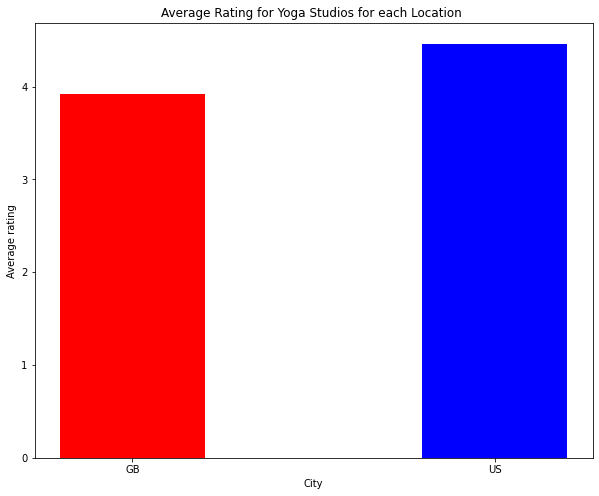

In [57]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.bar(Avg_Country.index, Avg_Country.values, color = ('Red', 'blue'), width = 0.4)

ax.set_xlabel("City")
ax.set_ylabel("Average rating")
ax.set_title("Average Rating for Yoga Studios for each Location ")
plt.show()

In [58]:
cur.execute("""
SELECT city, rating, review_count
FROM businesses
GROUP BY country
""")
avgR = pd.DataFrame(cur.fetchall())
avgR.columns = [x[0] for x in cur.description]
avgR

,city,rating,review_count
0,London,5.0,1
1,New York,4.5,146


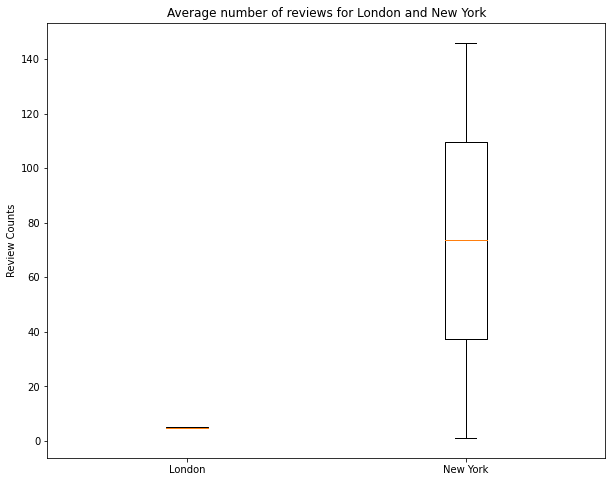

In [60]:
fig, ax = plt.subplots(figsize = (10,8))

# Add data: "height", "weight" as x-y, index as color
ax.boxplot([avgR.rating, avgR.review_count])

# Set the x-axis label to "CO2 (ppm)"
ax.set_xticklabels(['London', "New York"])

# Set the y-axis label to "Relative temperature (C)"
ax.set_ylabel("Review Counts")

ax.set_title('Average number of reviews for London and New York')


plt.show()

In [238]:
cur.execute("""
SELECT price, city, review_count
FROM businesses 
WHERE price = '$$$$' OR price = '$$$' OR price = '$$' OR price = '$'
""")
priceNYCdb = pd.DataFrame(cur.fetchall())
priceNYCdb.columns = [x[0] for x in cur.description]
priceNYCdb


,price,city,review_count
0,$$,New York,10
1,$$,New York,1
2,$$,Jersey City,40
3,$$$,New York,269
4,$$$,Guttenberg,38
5,$$,New York,9
6,$$$,New York,105
7,$$$,New York,12
8,$,New York,138
9,$$,New York,4


In [240]:
newcolumn = []

for x in priceNYCdb['price']:
    if x == '$':
        newcolumn.append(int(x.replace('$', str(1))))
    if x == '$$':
        newcolumn.append(int(x.replace('$$', str(2))))
    if x == '$$$':
        newcolumn.append(int(x.replace('$$$', str(3))))
    if x == '$$$$':
        newcolumn.append(int(x.replace('$$$$', str(4))))

In [242]:
priceNYCdb['newPrice'] = newcolumn

In [243]:
priceNYCdb

,price,city,review_count,newPrice
0,$$,New York,10,2
1,$$,New York,1,2
2,$$,Jersey City,40,2
3,$$$,New York,269,3
4,$$$,Guttenberg,38,3
5,$$,New York,9,2
6,$$$,New York,105,3
7,$$$,New York,12,3
8,$,New York,138,1
9,$$,New York,4,2


In [256]:
newcolumnUK = []

for x in priceUKdb['price']:
    if x == '£':
        newcolumnUK.append(int(x.replace('£', str(1))))
    if x == '££':
        newcolumnUK.append(int(x.replace('££', str(2))))
    if x == '£££':
        newcolumnUK.append(int(x.replace('£££', str(3))))
    if x == '££££':
        newcolumnUK.append(int(x.replace('££££', str(4))))

In [257]:
cur.execute("""
SELECT price, city, review_count
FROM businesses 
WHERE price = '££££' OR price = '£££' OR price = '££' OR price = '£'

""")
priceUKdb = pd.DataFrame(cur.fetchall())
priceUKdb.columns = [x[0] for x in cur.description]
priceUKdb

,price,city,review_count
0,££,London,8
1,£££,London,7
2,£££,Soho,15
3,££,London,5
4,£££,London,2
5,££,London,6
6,££££,London,7
7,£££,London,4
8,££,London,2
9,££££,London,2


In [258]:
len(newcolumnUK)

11

In [259]:
priceUKdb['newPrice'] = newcolumnUK 

In [260]:
priceUKdb

,price,city,review_count,newPrice
0,££,London,8,2
1,£££,London,7,3
2,£££,Soho,15,3
3,££,London,5,2
4,£££,London,2,3
5,££,London,6,2
6,££££,London,7,4
7,£££,London,4,3
8,££,London,2,2
9,££££,London,2,4


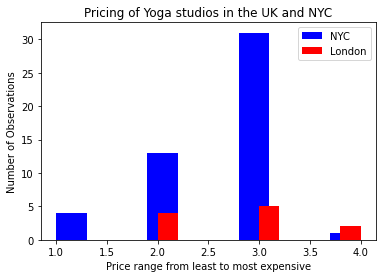

In [288]:
fig, ax = plt.subplots()
# Plot a histogram of "Weight" for mens_rowing
ax.hist(priceNYCdb['newPrice'], label = 'NYC',  color = 'blue')

# Compare to histogram of "Weight" for mens_gymnastics
ax.hist(priceUKdb['newPrice'], label= 'London', color = 'red')

# Set the x-axis label to "Weight (kg)"
ax.set_xlabel('Price range from least to most expensive')

# Set the y-axis label to "# of observations"
ax.set_ylabel('Number of Observations')

ax.set_title('Pricing of Yoga studios in the UK and NYC')

ax.legend()
plt.show()

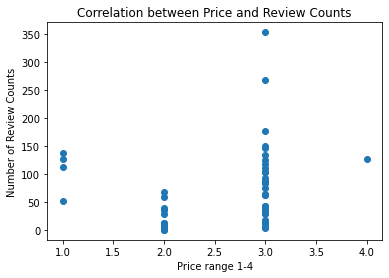

In [271]:
fig, ax = plt.subplots()

# Add data: "height", "weight" as x-y, index as color
ax.scatter(priceNYCdb["newPrice"], priceNYCdb["review_count"])

# Set the x-axis label to "CO2 (ppm)"
ax.set_xlabel("Price range 1-4")

# Set the y-axis label to "Relative temperature (C)"
ax.set_ylabel("Number of Review Counts")

ax.set_title('Correlation between Price and Review Counts')


plt.show()